Import libraries

In [1]:
import gensim
import gensim.downloader as download_api
russian_model = download_api.load('word2vec-ruscorpora-300')
from gensim.models.word2vec import Word2Vec
from gensim.models.fasttext import FastText
import nltk
from nltk.tokenize import word_tokenize
!pip install pymorphy2 > None
import numpy as np
import pandas as pd
import matplotlib as plt
import re
import pandas as pd
import pymorphy2
from nltk.stem.snowball import RussianStemmer
from nltk.tokenize import word_tokenize
import nltk
from string import punctuation
nltk.download('stopwords')
from  sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from nltk import wordpunct_tokenize, WordNetLemmatizer, sent_tokenize, pos_tag
from nltk.corpus import stopwords as sw, wordnet as wn
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import string
import re
punctuations = list(punctuation)
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')
morph = pymorphy2.MorphAnalyzer()
import nltk
nltk.download('punkt')
nltk.download('punkt')
tfidf_encoder = TfidfVectorizer()


[==================================================] 100.0% 198.8/198.8MB downloaded


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Download dataset and visualize

In [11]:
file_path = "job.xlsx"
df_vacancies = pd.read_excel(file_path)
df_vacancies.head(2)

,название вакансии,дата публикации,компания,уровень зарплаты,требуемый опыт работы,описание вакансии,адрес,тип занятости,ФИО,Телефон,почта,URL
0,Инженер-конструктор,24 ноября 2023 в Санкт-Петербурге,ООО Русь-Турбо,от 70 000 до 120 000 ₽ на руки,1–3 года,Обязанности: Разработка и проектирование запча...,"Санкт-Петербург, Ладожская, Новочеркасская, Пр...","Полная занятость, полный день",NaN,NaN,NaN,https://murmansk.hh.ru/vacancy/87418369?from=v...
1,Инженер-конструктор,22 ноября 2023 в Санкт-Петербурге,ГРУППА КОМПАНИЙ БАЗИС,от 80 000 до 110 000 ₽ на руки,1–3 года,Группа компаний Базис — крупная многопрофильна...,"Санкт-Петербург, Литейный проспект, 26","Полная занятость, полный день",NaN,NaN,NaN,https://murmansk.hh.ru/vacancy/88536853?from=v...


In [18]:
file_path = "resumesfor rec.xlsx"
df_resumes = pd.read_excel(file_path)
df_resumes.head(2)

,ФИО,возраст,пол,город,желаемая должность,желаемая зарплата,опыт работы,опыт работы полный,ключевые навыки,обо мне,образование,знание языков,телефон,email,URL,Фото
0,NaN,45 лет,Женщина,Раменское,Конструктор,40 000 ₽ на руки,23 года,Опыт работы 23 года 7 месяцев Май 2000 — по на...,NaN,Инженер конструктор (Московский Государственны...,"МГУс,инженер-конструктор,| Технческий Лицей,По...",Немецкий — A1 — Начальный,NaN,NaN,https://hh.ru/resume/b510d5450004f1220e0039ed1...,NaN
1,NaN,43 года,Мужчина,Москва,Конструктор,50 000 ₽ на руки,18 лет,Опыт работы 18 лет 7 месяцев Апрель 2013 — по ...,NaN,Грамотное составление и прочтение чертежей на ...,"Московский Государственный Университет Леса,26...",Русский — C2 — В совершенстве,NaN,NaN,https://hh.ru/resume/e7d88a640004eb7f500039ed1...,NaN


Предобработка текста

In [13]:
df_vacancies= df_vacancies.drop(['ФИО','Телефон','почта','URL'], axis=1)
df_vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8767 entries, 0 to 8766
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   название вакансии      8767 non-null   object
 1   дата публикации        8749 non-null   object
 2   компания               8737 non-null   object
 3   уровень зарплаты       4469 non-null   object
 4   требуемый опыт работы  8750 non-null   object
 5   описание вакансии      8754 non-null   object
 6   адрес                  8749 non-null   object
 7   тип занятости          8750 non-null   object
dtypes: object(8)
memory usage: 548.1+ KB


In [19]:
df_resumes= df_resumes.drop(['ФИО','телефон','URL','email','Фото'], axis=1)
df_resumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   возраст             4675 non-null   object
 1   пол                 4971 non-null   object
 2   город               4972 non-null   object
 3   желаемая должность  4972 non-null   object
 4   желаемая зарплата   2729 non-null   object
 5   опыт работы         4802 non-null   object
 6   опыт работы полный  4783 non-null   object
 7   ключевые навыки     209 non-null    object
 8   обо мне             4306 non-null   object
 9   образование         4831 non-null   object
 10  знание языков       4969 non-null   object
dtypes: object(11)
memory usage: 427.4+ KB


In [20]:
def preprocessing(text):
    tokens = word_tokenize(text) #токенизация
    tokens_without_punct = [i for i in tokens if i not in punctuations] # удаление пунктуации
    low_tokens = [i.lower() for i in tokens_without_punct] # приведение к нижнему регистру
    words_without_stop = [i for i in low_tokens if i not in stopwords] # удаление стоп-слов
    lemms = [morph.parse(i)[0].normal_form for i in words_without_stop] # лемматизация
    lemms_without_digits = [i for i in lemms if not i.isdigit()]
    #lemms_without_special_chars = [i for i in lemms_without_digits if i not in ['``', ' '' ', '00', '000', '00000','ёпрстый', 'ёха', 'ёё','который','мой']]
    return lemms_without_digits
def remove_chars(text, chars):
    for char in chars:
        text = text.replace(char, '')
    return text

In [21]:
df_vacancies['описание вакансии_tokenized'] = df_vacancies['описание вакансии'].apply(lambda x: preprocessing(str(x)))
df_resumes['обо мне_tokenized'] = df_resumes['обо мне'].apply(lambda x: preprocessing(str(x)))

## Работа с вакансиями

Разметка данных

In [103]:
import pandas as pd
def duties(data):
    result = []
    between = False
    for word in data:
        if word == 'обязанность' or word == 'ценность' or word == 'предстоять' or word == 'задача' or word == 'делать':
            between = True
        elif word == 'ожидание' or word == 'требование' or word == 'опыт' or word == 'ждать':
            between = False
        elif between:
            result.append(word)
    return result

def demands(data):
    result = []
    between = False
    for word in data:
        if word == 'ожидание' or word == 'требование' or word == 'опыт' or word == 'ждать':
            between = True
        elif word == 'условие' or word == 'предлагать':
            between = False
        elif between:
            result.append(word)
    return result

def skills(data):
    result = []
    between = False
    for word in data:
        if word == 'инструмент' or word == 'знание' or word == 'система' or word == 'стек':
            between = True
        elif word == 'условие' or word == 'предлагать':
            between = False
        elif between:
            result.append(word)
    return result

# Применить функцию к колонке "words" и создать новую колонку "words_between"
df_vacancies['Duties'] = df_vacancies['описание вакансии_tokenized'].apply(duties)
df_vacancies['Demands'] = df_vacancies['описание вакансии_tokenized'].apply(demands)
df_vacancies['Skills'] = df_vacancies['Demands'].apply(skills)


# Создание словаря стоп-слов и анализ частотных слов и словосочетаний.

In [104]:
import gensim
import gensim.downloader as download_api
russian_model = download_api.load('word2vec-ruscorpora-300')
from gensim.models.word2vec import Word2Vec
from gensim.models.fasttext import FastText
import nltk
from nltk.tokenize import word_tokenize
!pip install pymorphy2 > None
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short
from nltk import bigrams
import pandas as pd
import matplotlib.pyplot as plt

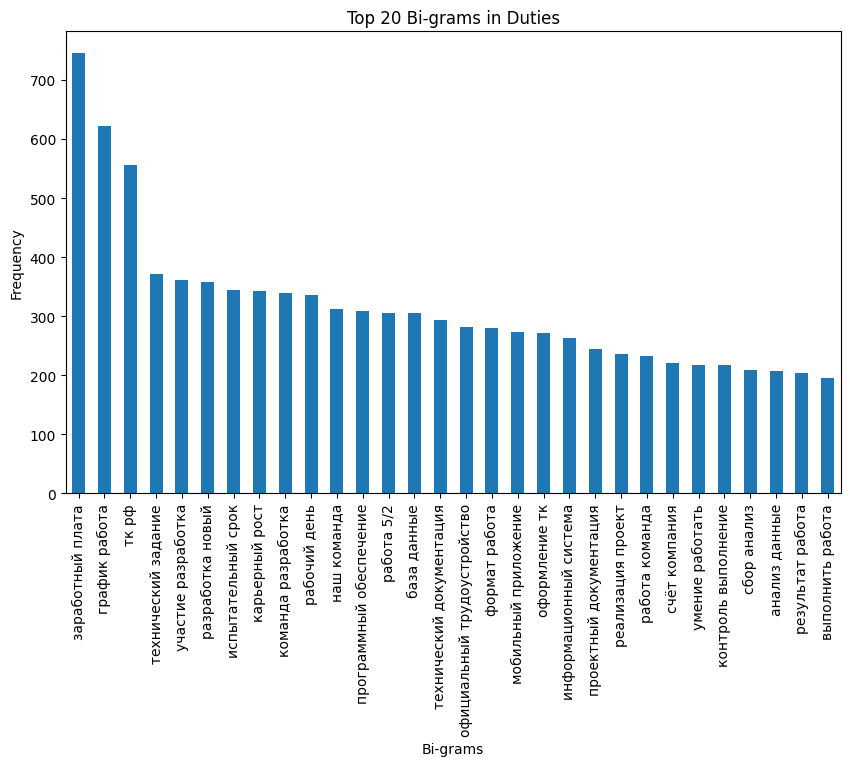

In [105]:
df_vacancies['Duties_bigrams'] = df_vacancies['Duties'].apply(lambda x: list(bigrams(x)))

# Подсчет частоты би-грамм
bi_grams = []
for bigram_list in df_vacancies['Duties_bigrams']:
    for bigram in bigram_list:
        bi_grams.append(' '.join(bigram))

bi_gram_freq = pd.Series(bi_grams).value_counts()

# Визуализация
plt.figure(figsize=(10, 6))
bi_gram_freq.head(30).plot(kind='bar')
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.title('Top 20 Bi-grams in Duties')
plt.show()

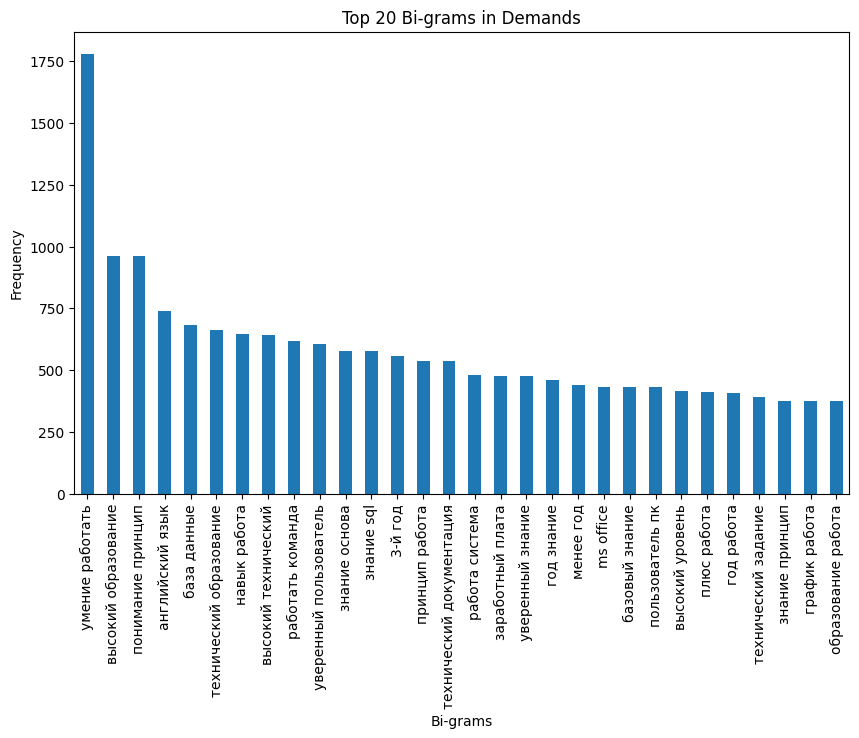

In [106]:
df_vacancies['Demands_bigrams'] = df_vacancies['Demands'].apply(lambda x: list(bigrams(x)))

# Подсчет частоты би-грамм
bi_grams = []
for bigram_list in df_vacancies['Demands_bigrams']:
    for bigram in bigram_list:
        bi_grams.append(' '.join(bigram))

bi_gram_freq = pd.Series(bi_grams).value_counts()

# Визуализация
plt.figure(figsize=(10, 6))
bi_gram_freq.head(30).plot(kind='bar')
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.title('Top 20 Bi-grams in Demands')
plt.show()

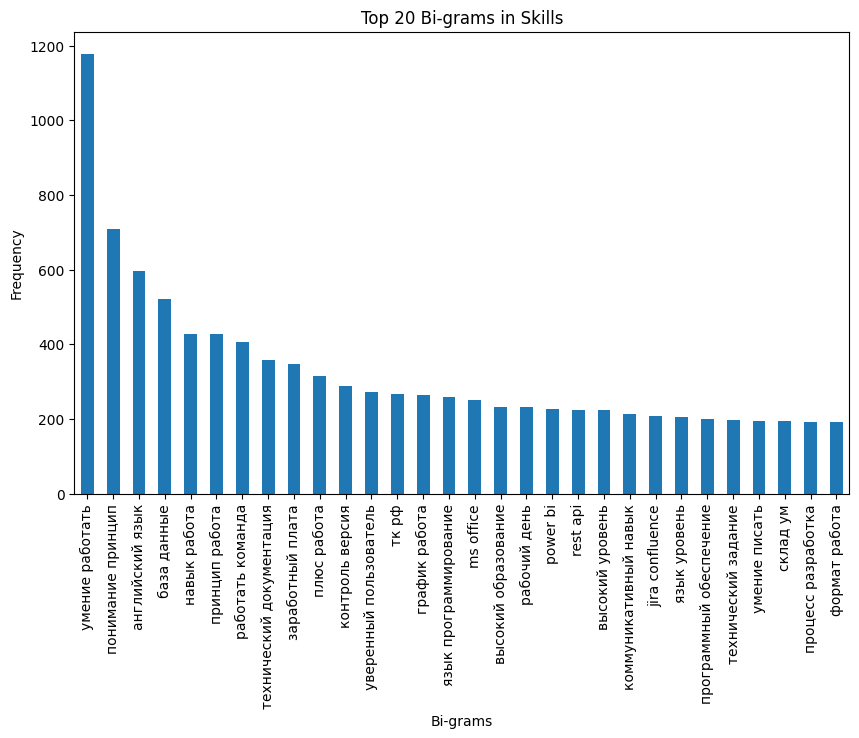

In [107]:
df_vacancies['Skills_bigrams'] = df_vacancies['Skills'].apply(lambda x: list(bigrams(x)))

# Подсчет частоты би-грамм
bi_grams = []
for bigram_list in df_vacancies['Skills_bigrams']:
    for bigram in bigram_list:
        bi_grams.append(' '.join(bigram))

bi_gram_freq = pd.Series(bi_grams).value_counts()

# Визуализация
plt.figure(figsize=(10, 6))
bi_gram_freq.head(30).plot(kind='bar')
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.title('Top 20 Bi-grams in Skills')
plt.show()

Создадим для каждого класса требований свой стоп-словарь и подберем оптимальное количество удаление стоп-слов на основе уровня"схожести" текстовых данных.

In [108]:
# Функция для оценки уровня схожести списков и стоп-слов
def similarity(lst1, lst2):
    common_words = [word1 for word1 in lst1 for word2 in lst2 if word1 == word2]
    return len(common_words) / min(len(lst1)+1, len(lst2)+1)

to_remove = []

for index, row in df_vacancies.iterrows():
    words1 = row['Duties_bigrams']
    words2 = row['Demands_bigrams']
    words3 = row['Skills_bigrams']

    sim_12 = similarity(words1, words2)
    sim_13 = similarity(words1, words3)

    if sim_12 > 0.8 and sim_13 > 0.9:
        to_remove.extend([word for word, _ in words1[:int(0.1*len(words1))]])
        words1 = words1[int(0.1*len(words1)):]

        to_remove.extend([word for word, _ in words2[:int(0.1*len(words2))]])
        words2 = words2[int(0.1*len(words2)):]

        to_remove.extend([word for word, _ in words3[:int(0.1*len(words3))]])
        words3 = words3[int(0.1*len(words3)):]

# Вывод списка удаленных слов
print(to_remove)

['проектирование', 'новый', 'конструкция', 'механизм', 'кандидат', 'знание', 'ескд', 'проектирование', '3dи', '2d', 'среда', 'solidworks', 'ескд', 'проектирование', '3dи', '2d', 'среда', 'solidworks', 'autocad', 'заниматься', 'автоматизация', 'управленческий', 'понимание', 'метод', 'подход', 'анализ', 'данные', 'область', 'финансы', 'экономика', 'владение', 'вывод', 'основа', 'данные', 'прогнозировать', 'знание', 'методология', 'разработка', 'продуктовый', 'аналитик', 'fmcg', '2-й', 'год', 'знание', 'метод', 'анализ', 'данные', 'работа', 'инструмент', 'аналитик', 'данные', 'например', 'google', 'analytics', 'sql', 'excel', 'умение', 'метод', 'анализ', 'данные', 'работа', 'аналитик', 'данные', 'например', 'google', 'analytics', 'sql', 'excel', 'умение', 'анализировать', 'дать', 'искать', 'причина', 'выдвигать', 'обоснованный', 'отдел', 'высокий', 'образование', 'it', 'строительный', 'специальность', 'разработка', 'python', 'программа', 'visual', 'studio', 'построение', 'мl-модель', 'раб

In [ ]:
# Добавим стоп-слова для формирования очищенных форм записи навыков, требований и обязанностей, упомянутых в вакансии и опять оценим уровень схожести трех текстов:


In [109]:
def remove_words(lst):
    return [word for word in lst if word not in to_remove]

# Apply the function to each row of the 'Demands' column
df_vacancies['Demands'] = df_vacancies['Demands'].apply(remove_words)
df_vacancies['Skills'] = df_vacancies['Skills'].apply(remove_words)
df_vacancies['Duties'] = df_vacancies['Duties'].apply(remove_words)

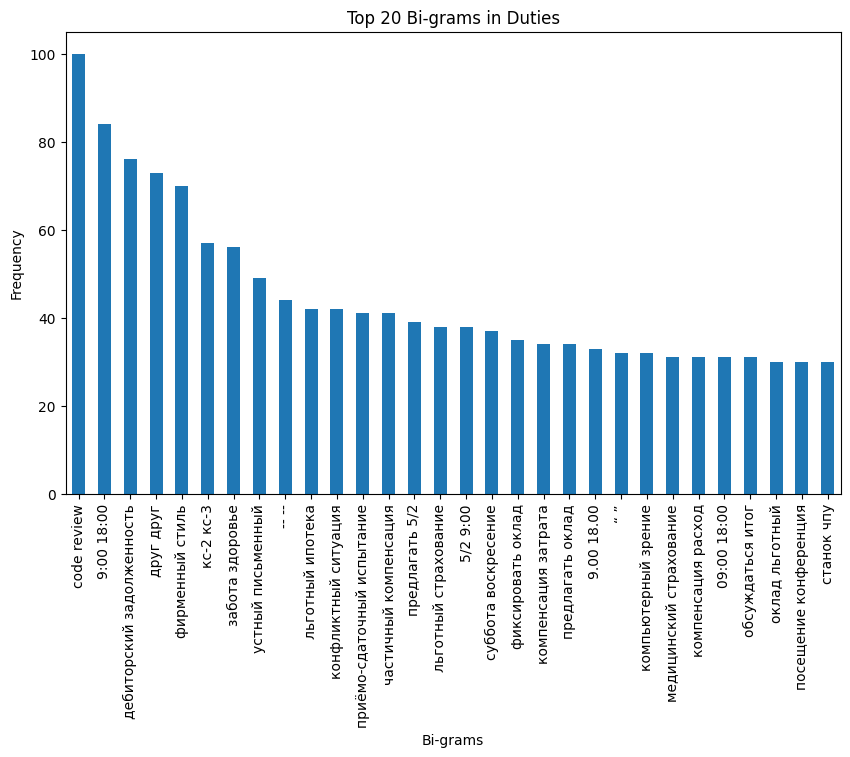

In [110]:
df_vacancies['Duties_bigrams'] = df_vacancies['Duties'].apply(lambda x: list(bigrams(x)))

# Подсчет частоты би-грамм
bi_grams = []
for bigram_list in df_vacancies['Duties_bigrams']:
    for bigram in bigram_list:
        bi_grams.append(' '.join(bigram))

bi_gram_freq = pd.Series(bi_grams).value_counts()

# Визуализация
plt.figure(figsize=(10, 6))
bi_gram_freq.head(30).plot(kind='bar')
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.title('Top 20 Bi-grams in Duties')
plt.show()

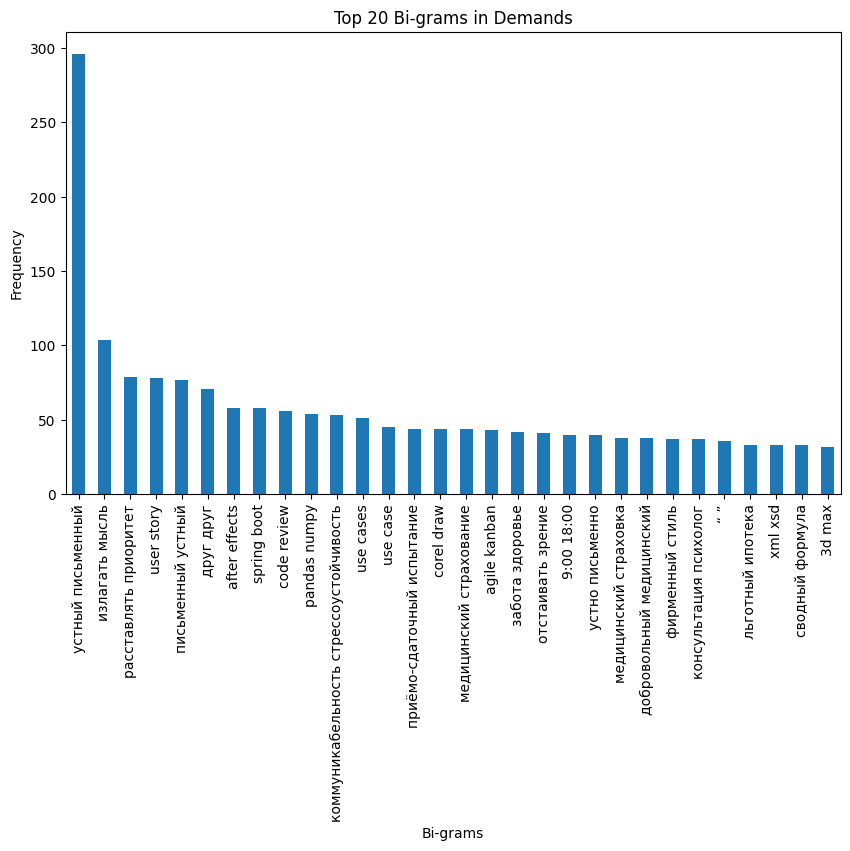

In [111]:
df_vacancies['Demands_bigrams'] = df_vacancies['Demands'].apply(lambda x: list(bigrams(x)))

# Подсчет частоты би-грамм
bi_grams = []
for bigram_list in df_vacancies['Demands_bigrams']:
    for bigram in bigram_list:
        bi_grams.append(' '.join(bigram))

bi_gram_freq = pd.Series(bi_grams).value_counts()

# Визуализация
plt.figure(figsize=(10, 6))
bi_gram_freq.head(30).plot(kind='bar')
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.title('Top 20 Bi-grams in Demands')
plt.show()

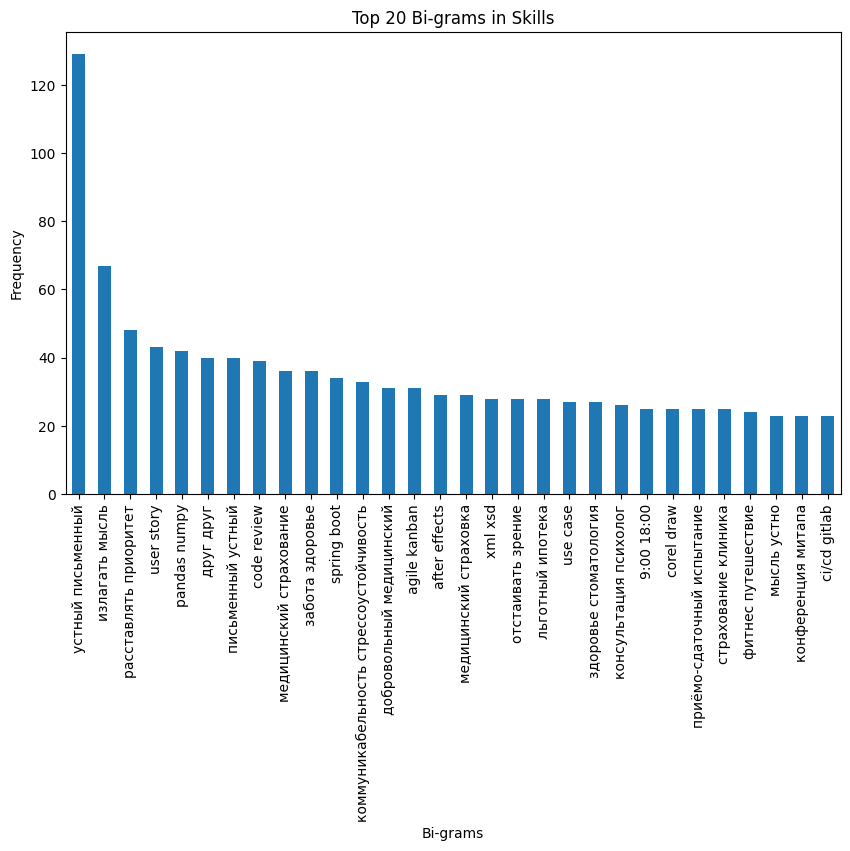

In [112]:
df_vacancies['Skills_bigrams'] = df_vacancies['Skills'].apply(lambda x: list(bigrams(x)))

# Подсчет частоты би-грамм
bi_grams = []
for bigram_list in df_vacancies['Skills_bigrams']:
    for bigram in bigram_list:
        bi_grams.append(' '.join(bigram))

bi_gram_freq = pd.Series(bi_grams).value_counts()

# Визуализация
plt.figure(figsize=(10, 6))
bi_gram_freq.head(30).plot(kind='bar')
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.title('Top 20 Bi-grams in Skills')
plt.show()

In [119]:
# Функция для оценки уровня схожести списков и стоп-слов
def similarity(lst1, lst2):
    common_words = [word1 for word1 in lst1 for word2 in lst2 if word1 == word2]
    return len(common_words) / min(len(lst1)+1, len(lst2)+1)

similarity(df_vacancies['Demands_bigrams'], df_vacancies['Skills_bigrams'])


321.1397125912409

In [120]:
similarity(df_vacancies['Demands_bigrams'], df_vacancies['Duties_bigrams'])


120.42963047445255

In [121]:
similarity(df_vacancies['Skills_bigrams'], df_vacancies['Duties_bigrams'])

440.51779197080293

Работа с признаками :

In [156]:
df_vacancies['адрес'] = df_vacancies['адрес'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
def add_experience_level_column(df_vacancies):
  df_vacancies['уровни'] = df_vacancies['название вакансии'].apply(lambda x: 'Начинающий' if 'junior' in x.lower() or 'младший' in x.lower() else 'Продолжающий' if 'middle' in x.lower() else 'Ведущий' if 'senior' in x.lower() or 'ведущий' in x.lower() else None)

  return df_vacancies
add_experience_level_column(df_vacancies)

In [174]:
df_vacancies['salary_range'] = df_vacancies['уровень зарплаты'].str.replace('от ', '').str.replace('до ', '').str.replace('₽ на руки', '').str.strip().str.replace(' ', '').str.strip().str.replace('вычетаналогов	', '').str.strip().str.split('').str[0]

def extract_salary(x):
    if not isinstance(x, float):
        return x.split(' ')[-1] if len(x.split(' ')) > 1 else x.split(' ')[0]
    return x
df_vacancies['salary_range_lower'] = df_vacancies['уровень зарплаты'].str.replace('от ', '').str.replace('до ', '').str.replace('₽ на руки', '').str.strip().str.split('').str[0]
df_vacancies['salary_range_upper'] = df_vacancies['уровень зарплаты'].str.replace('от ', '').str.replace('до ', '').str.replace('₽ на руки', '').str.strip().str.split(' ').str[-1]


Результаты